In [2]:
import numpy as np
import meanderpy as mp
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import viridis
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
mpl.rcParams['figure.dpi'] = 500  

In [3]:
def run_meander_simulation(freq_multiplier, amplitude, multiplier):
    nit = 501                  # number of iterations
    W = 100.0                    # channel width (m)
    D = 1.0                      # channel depth (m)
    depths = D * np.ones((nit,))  # channel depths for different iterations
    pad = 25                # padding (number of nodepoints along centerline)
    deltas = 50.0                # sampling distance along centerline
    Cfs =0.006 * np.ones((nit,)) # dimensionless Chezy friction factor
    crdist = 3*multiplier* W               # threshold distance at which cutoffs occur
    kl = 500.0/(365*24*60*60.0)   # migration rate constant (m/s)
    kv =  1.0e-12               # vertical slope-dependent erosion rate constant (m/s)
    dt = 0.1*0.5*365*24*60*60.0     # time step (s)
    dens = 1000                  # density of water (kg/m3)
    saved_ts = 1                # which time steps will be saved
    n_bends = 1                 # approximate number of bends you want to model
    Sl = 0.0                     # initial slope (matters more for submarine channels than rivers)
    t1 = 0                    # time step when incision starts
    t2 = 0                    # time step when lateral migration starts
    t3 = 0                    # time step when aggradation starts
    aggr_factor = 2e-19         # aggradation factor (m/s, about 0.18 m/year, it kicks in after t3)
    x_initial = np.linspace(0.1, 20030, 3000)
    y_initial = (amplitude * 10) * np.sin(freq_multiplier * np.pi * x_initial / 1000.0)
    z_initial = np.zeros_like(x_initial)
    ch = mp.Channel(x_initial, y_initial, z_initial, W, depths[0])
    chb = mp.ChannelBelt([ch], [], [0.0], [])
    chb.migrate(nit, saved_ts, deltas, pad, crdist, depths, Cfs, kl, kv, dt, dens, t1, t2, t3, aggr_factor)
    return chb

In [4]:
deltas = np.concatenate((np.logspace(-10, -15, 5), -np.logspace(-10, -15, 5)))
perturbations = [1 + delta for delta in deltas]
#perturbations = [1 for delta in deltas]

# Run simulations for each perturbation
chb_unperturbed = run_meander_simulation(1, 1, 1)
chb_perturbed = [run_meander_simulation(1, perturb, 1) for perturb in perturbations]

  0%|          | 0/501 [00:00<?, ?it/s]

100%|██████████| 501/501 [00:11<00:00, 44.45it/s]


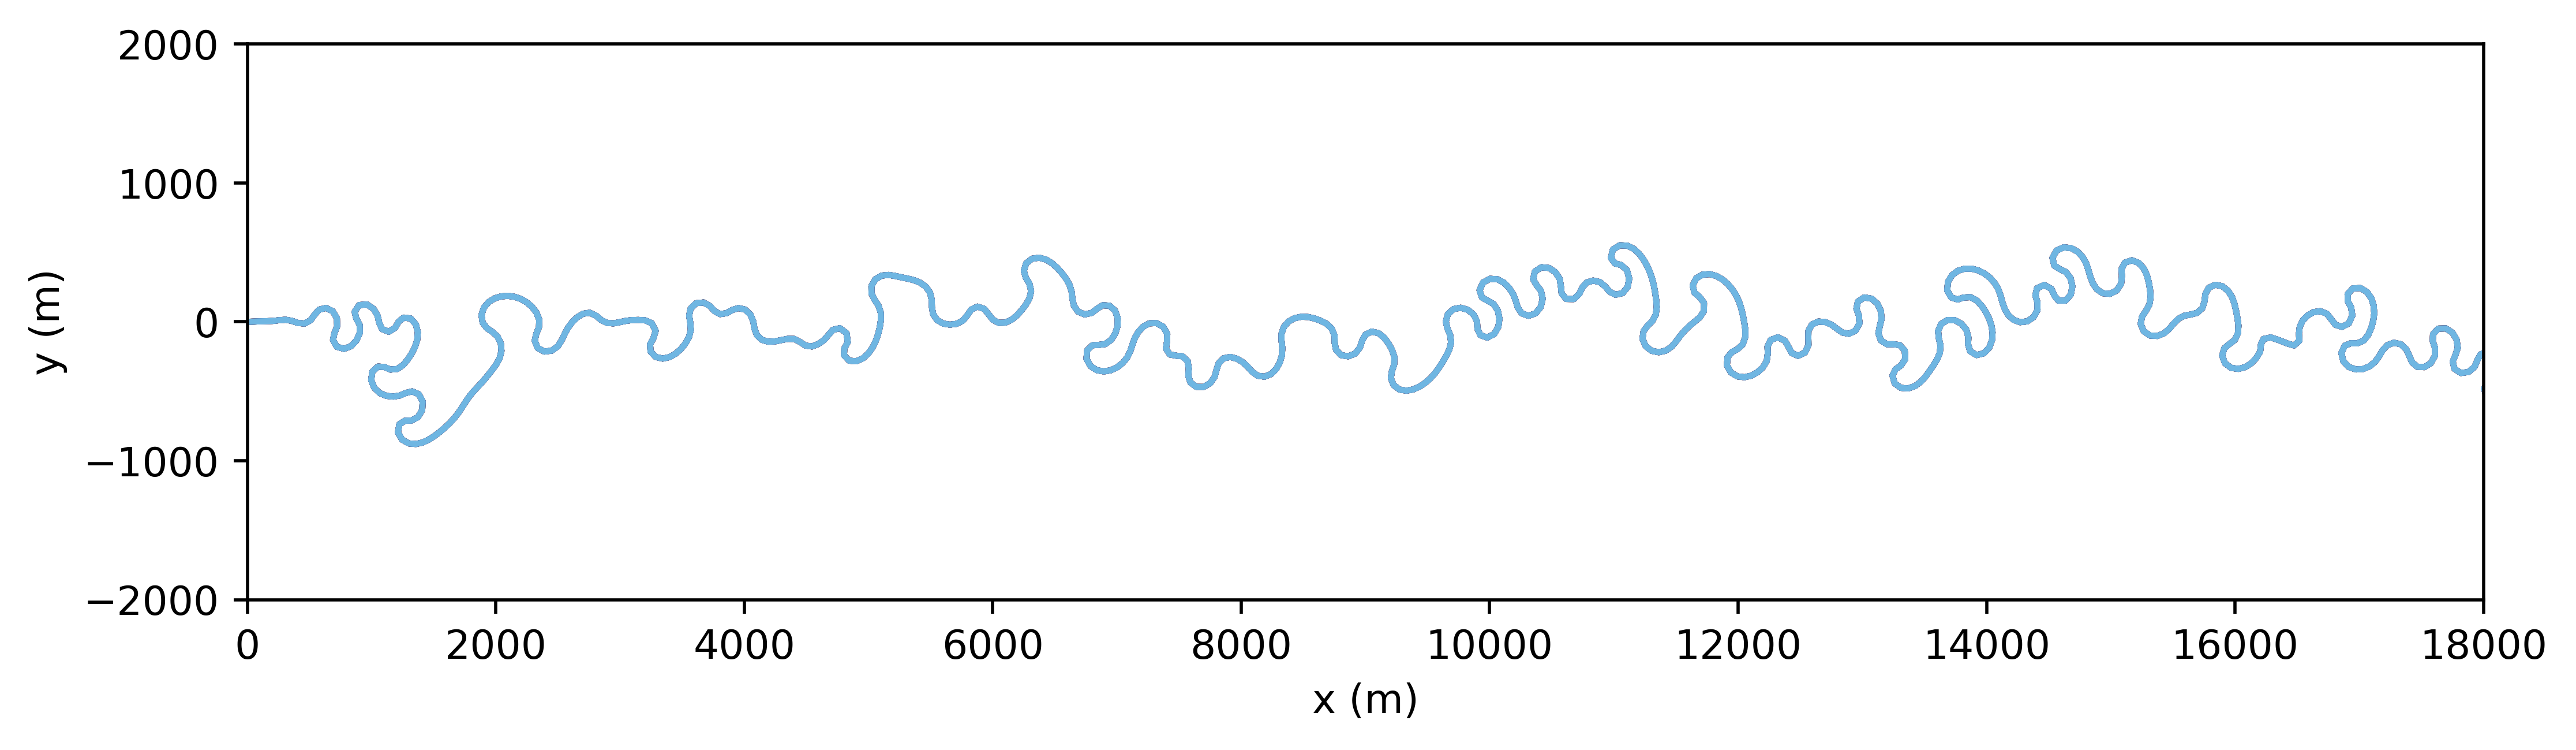

In [10]:
import cmcrameri.cm as cmc

iteration = 100
channel_unperturbed = chb_unperturbed.channels[iteration]
channels_perturbed = [chb.channels[iteration] for chb in chb_perturbed]

# Plot the channels at iteration 500
plt.figure(figsize=(10,2.5))
plt.plot(channel_unperturbed.x, channel_unperturbed.y, label="Unperturbed", color="black", linewidth=1)

# Use a perceptually uniform colormap as an alternative to lapaz
colors = cmc.managua(np.linspace(0.1, 0.9, len(channels_perturbed)))

for i, (channel, color) in enumerate(zip(channels_perturbed, colors)):
    plt.plot(channel.x, channel.y, color=color, label=f"Perturbed {i+1}")

plt.xlim([0,18000])
plt.ylim([-2000,2000])
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.show()

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc

# Define the output directory
output_dir = "/Users/braydennoh/Documents/phasespace/2.24/riverchannel/perturb1"
os.makedirs(output_dir, exist_ok=True)  # Ensure the directory exists

# Iterate over the range 0 to 1000, saving every 10th iteration
for iteration in range(0, 501, 1):
    channel_unperturbed = chb_unperturbed.channels[iteration]
    channels_perturbed = [chb.channels[iteration] for chb in chb_perturbed]

    # Create the figure
    plt.figure(figsize=(10, 2.5))
    plt.plot(channel_unperturbed.x, channel_unperturbed.y, label="Unperturbed", color="black", linewidth=1)

    # Use the colormap from cmcrameri
    colors = cmc.managua(np.linspace(0.2, 0.9, len(channels_perturbed)))

    for i, (channel, color) in enumerate(zip(channels_perturbed, colors)):
        plt.plot(channel.x, channel.y, color=color, label=f"Perturbed {i+1}")


    plt.xlim([0,18000])
    plt.ylim([-2000,2000])
    plt.axis("off")
    # Add iteration number in the top-left corner
    plt.text(0.02, 0.95, f"t = {iteration}", transform=plt.gca().transAxes, fontsize=12, 
             verticalalignment='top', horizontalalignment='left')

    # Save the figure with dpi=300
    filename = os.path.join(output_dir, f"riverchannel_iter_{iteration:04d}.png")
    plt.savefig(filename, dpi=200, bbox_inches='tight')
    plt.close()  # Close the figure to free memory

print("All images have been saved successfully.")


All images have been saved successfully.


In [19]:
import imageio.v2 as imageio
import os

# Define input and output paths
input_dir = "/Users/braydennoh/Documents/phasespace/2.24/riverchannel/perturb1"
output_gif = "/Users/braydennoh/Documents/phasespace/2.24/riverchannel/perturb2.gif"

filenames = [os.path.join(input_dir, f"riverchannel_iter_{i:04d}.png") for i in range(0, 250, 1)]

# Create GIF
with imageio.get_writer(output_gif, mode='I', duration=0.05) as writer:  # Adjust duration for speed
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

print(f"GIF saved successfully at {output_gif}")


GIF saved successfully at /Users/braydennoh/Documents/phasespace/2.24/riverchannel/perturb2.gif
